# Weather prediction Model With Classification Machine Learning 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
df=pd.read_csv("~/Downloads/seattle-weather.csv.xls")

In [ ]:
 # Checking about the data 

In [9]:
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [13]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [14]:
df.shape

(1461, 6)

In [17]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [18]:
# Checking for the missing value

In [19]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [25]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [21]:
# Changing the data type of the date  from object to the Date 

In [27]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [29]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [35]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

# Univariate analysis on the Numerical columns 

In [38]:
df.select_dtypes(include=np.number).columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

In [39]:
nums=['precipitation', 'temp_max', 'temp_min', 'wind']

In [40]:
# We wil plot the Numerical attributes in a loop 

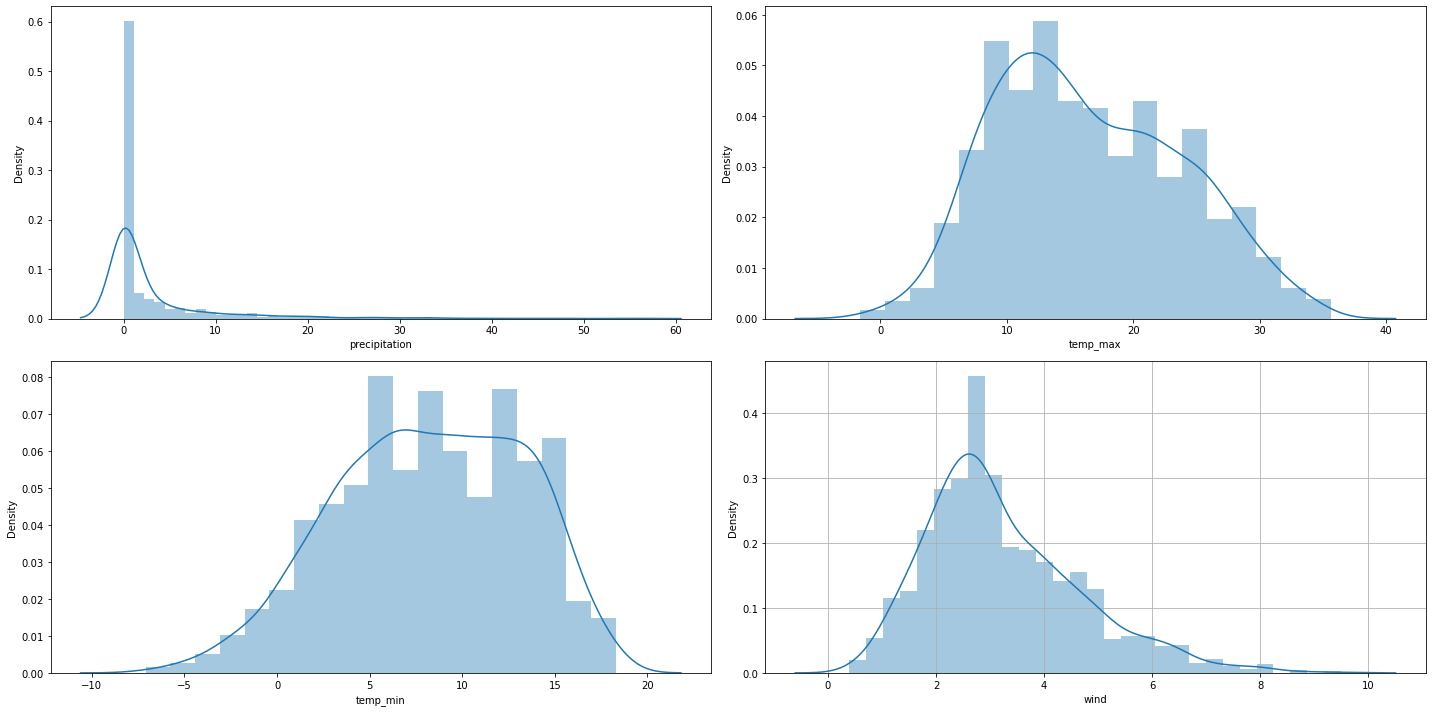

In [42]:
import matplotlib.pyplot as plt
# for warnings
import warnings
warnings.filterwarnings('ignore')
#Plot dimension
plt.rcParams['figure.figsize']=[20,10]
row=2
cols=2
counter=1
for i in nums:
    plt.subplot(row,cols,counter)
    sns.distplot(df.loc[:,i])
    counter+=1
    
    
plt.tight_layout()
plt.grid(True)
plt.show()


In [43]:
# Infrences::



In [44]:
# As we have the TGT as weather which we have to predict from the modelling 


# Bivariate analysis 

In [45]:
# As we will plot our target variable with another dependent variables in the data to check the relation 

In [46]:
df.head(1)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle


In [ ]:
 # Weather vs Participation 

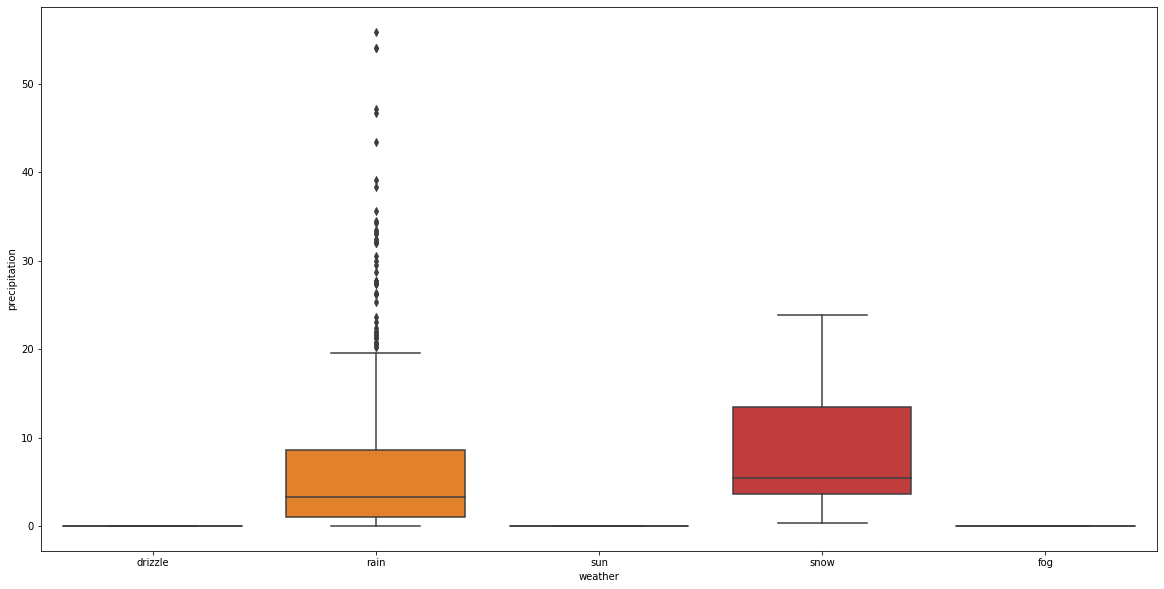

In [47]:
sns.boxplot(x='weather',y='precipitation',data=df)
plt.show()

In [48]:
# Weather vs temperature Max::

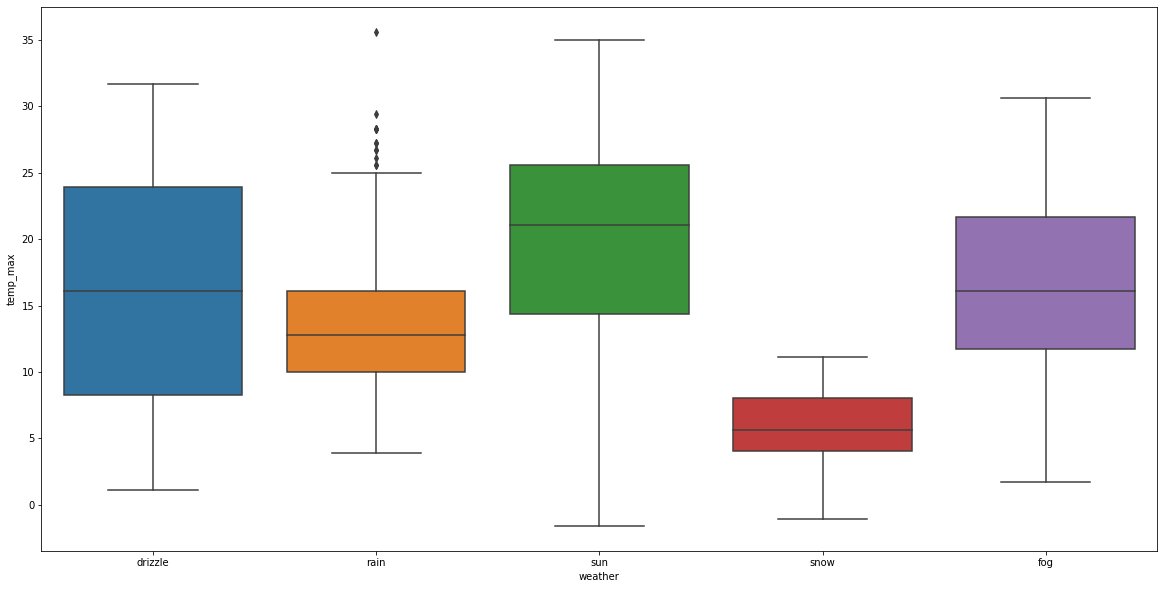

In [49]:
sns.boxplot(x='weather',y='temp_max',data=df)
plt.show()

In [50]:
# Weather vs temp_min

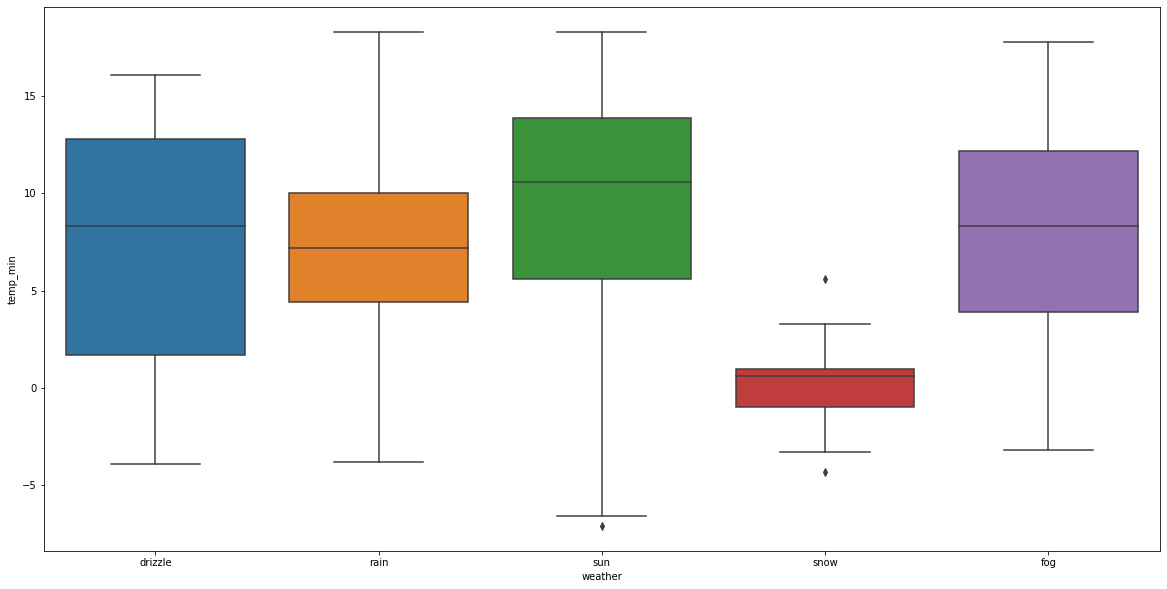

In [51]:
sns.boxplot(x='weather',y='temp_min',data=df)
plt.show()

In [52]:
# Weather vs wind ::


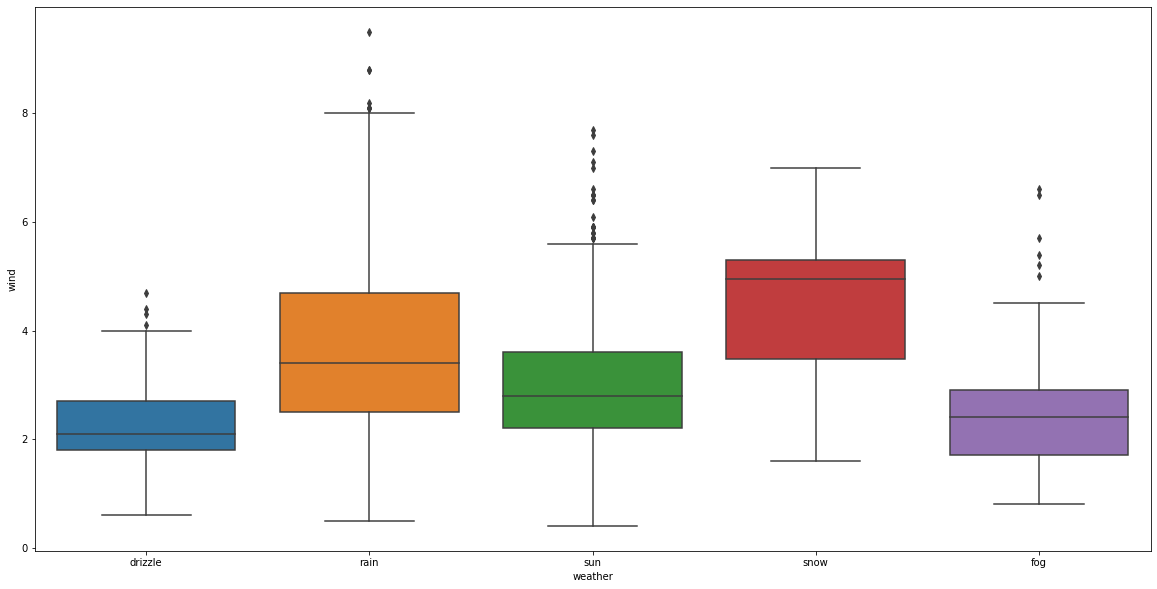

In [98]:
sns.boxplot(x='weather',y='wind',data=df)
plt.show()

In [55]:
# Infrences ::
# As we can see that th wind is very fast in the Rain 
# Least wind is found out in the weather that is drizzle
# Min temperature is recorded in the weather of the snow 
# Max weather is recorded on sunny days 

In [56]:
# Checking the correlation betwee the attributes 

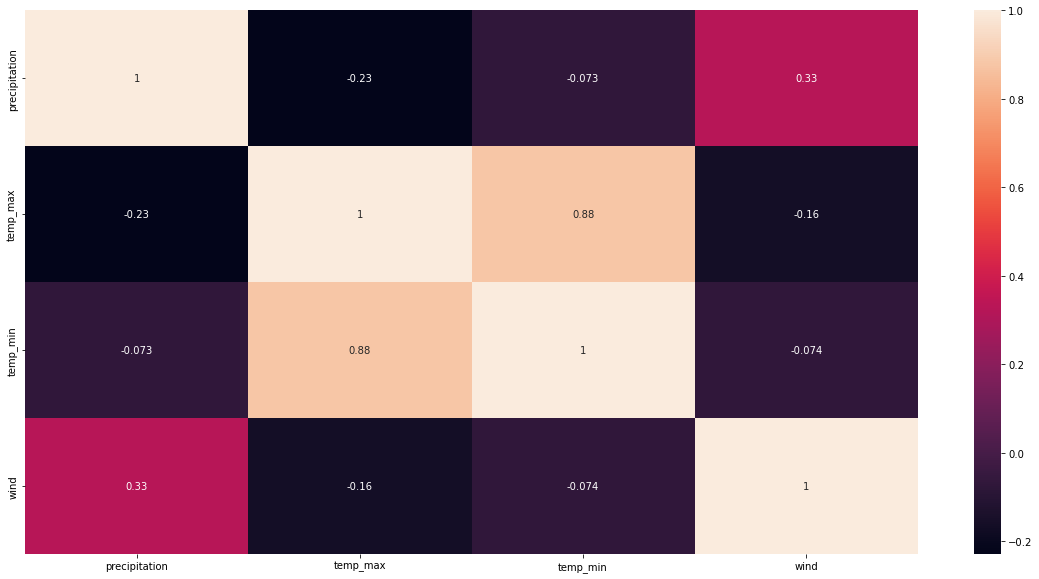

In [99]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
#. Temp Min max has a co relation between both 

# Removing and checking for the Outliers ::

In [61]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<AxesSubplot:xlabel='precipitation'>

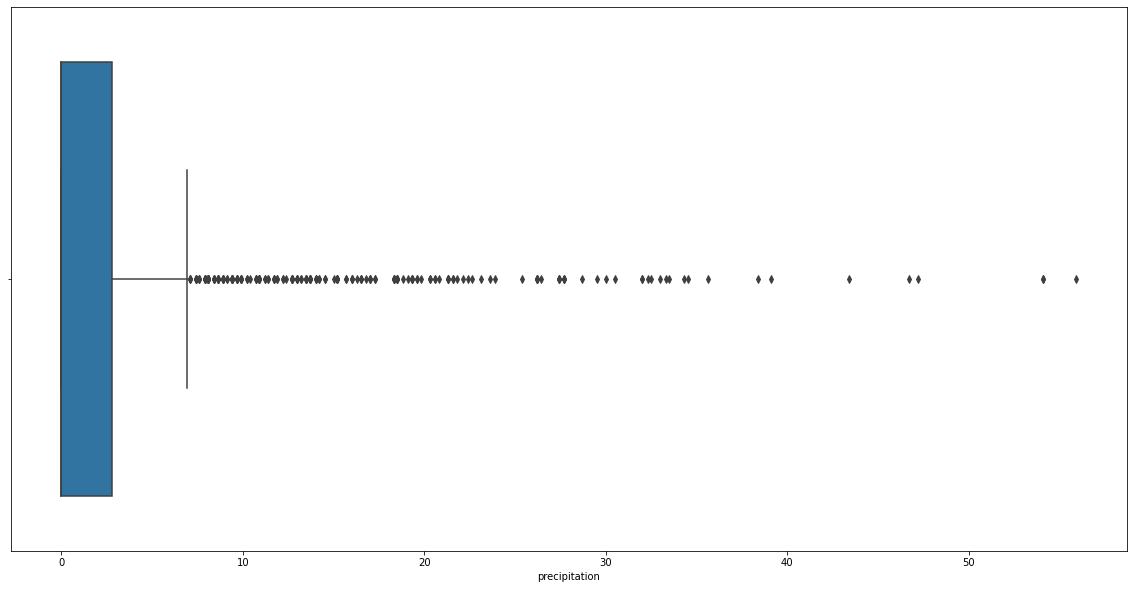

In [62]:
sns.boxplot(df.precipitation)

<AxesSubplot:xlabel='temp_max'>

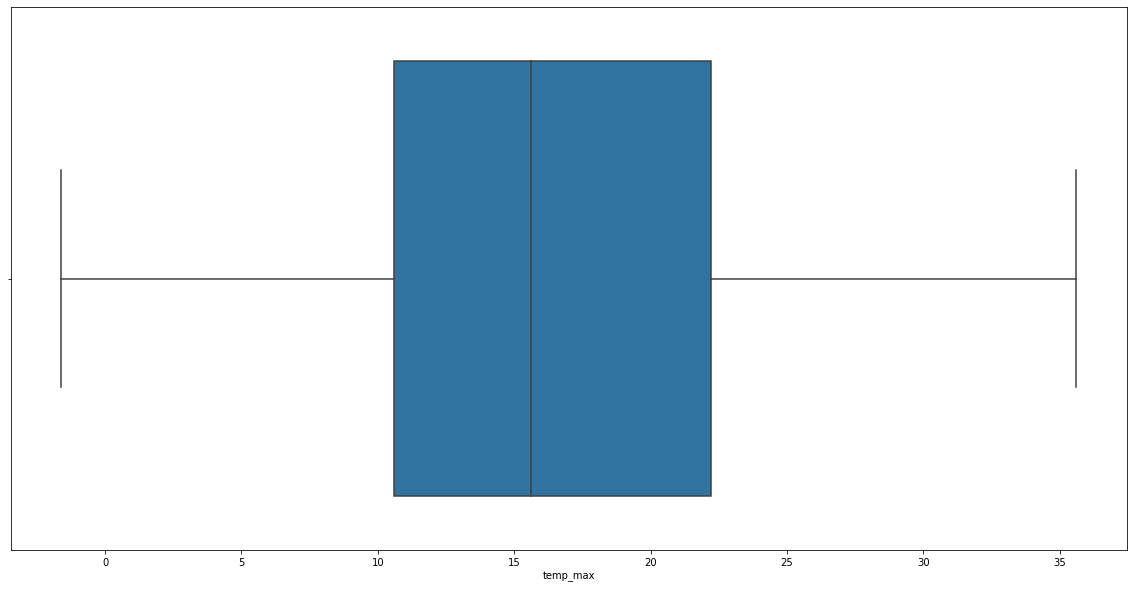

In [63]:
sns.boxplot(df.temp_max)

In [64]:
# Temp Max has no Outlieres 

<AxesSubplot:xlabel='temp_min'>

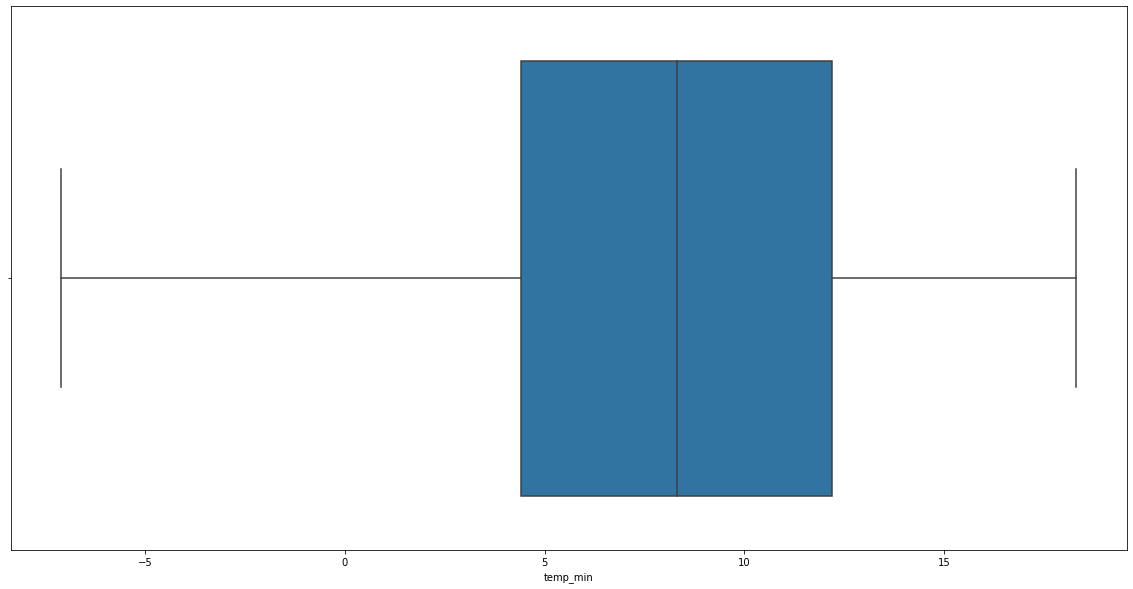

In [65]:
sns.boxplot(df.temp_min)

In [66]:
# Temp Min has no Outlieres

<AxesSubplot:xlabel='wind'>

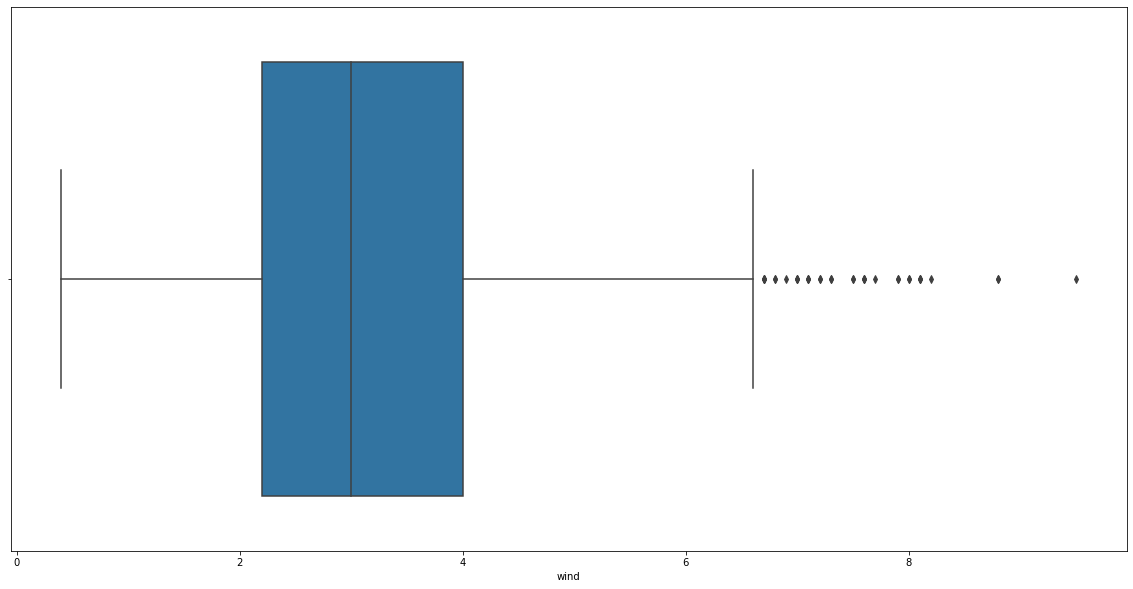

In [67]:
sns.boxplot(df.wind)

In [68]:
# As we have checked that two attributes has the outliers that is preception and wind 
# so we will deal the outliers first 
# Then we will scale the data according to the requirement 

# Removing Outliers 

In [72]:
q1=df.precipitation.quantile(0.25)
q3=df.precipitation.quantile(0.75)
iqr=q3-q1
upper_limit_precipitation=q3+1.5*iqr

In [73]:
df.loc[df.precipitation>upper_limit_precipitation,['precipitation']]

,precipitation
1,10.9
3,20.3
16,8.1
17,19.8
18,15.2
...,...
1441,16.0
1446,21.8
1447,18.5
1450,27.4


In [74]:
q1=df.wind.quantile(0.25)
q3=df.wind.quantile(0.75)
iqr=q3-q1
upper_limit_wind=q3+1.5*iqr

In [76]:
df.loc[df.wind>upper_limit_wind,['wind']]

,wind
20,8.2
48,8.1
51,7.5
59,7.0
62,7.0
91,6.8
120,8.0
276,7.3
351,9.5
372,7.3


In [87]:
df1=df.loc[~(df.precipitation>upper_limit_precipitation)]

In [88]:
df1.shape # The rows are dropped which have the outliers in it 

(1255, 6)

In [91]:
df1=df1.loc[~(df1.wind>upper_limit_wind)]

In [92]:
df1.shape

(1233, 6)

<AxesSubplot:xlabel='precipitation'>

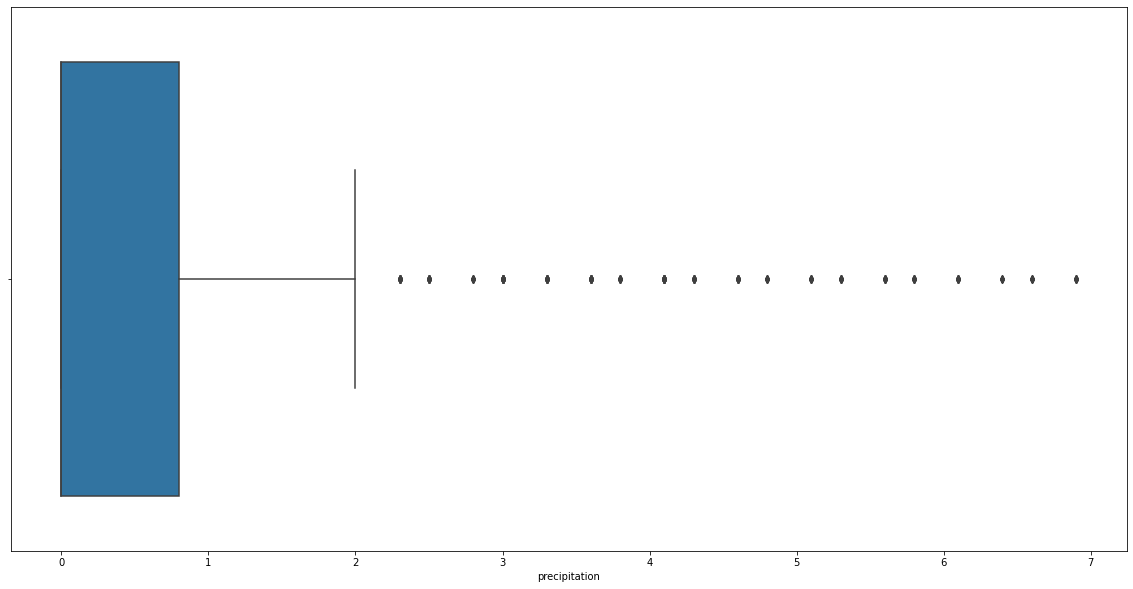

In [90]:
sns.boxplot(df1.precipitation)

<AxesSubplot:xlabel='wind'>

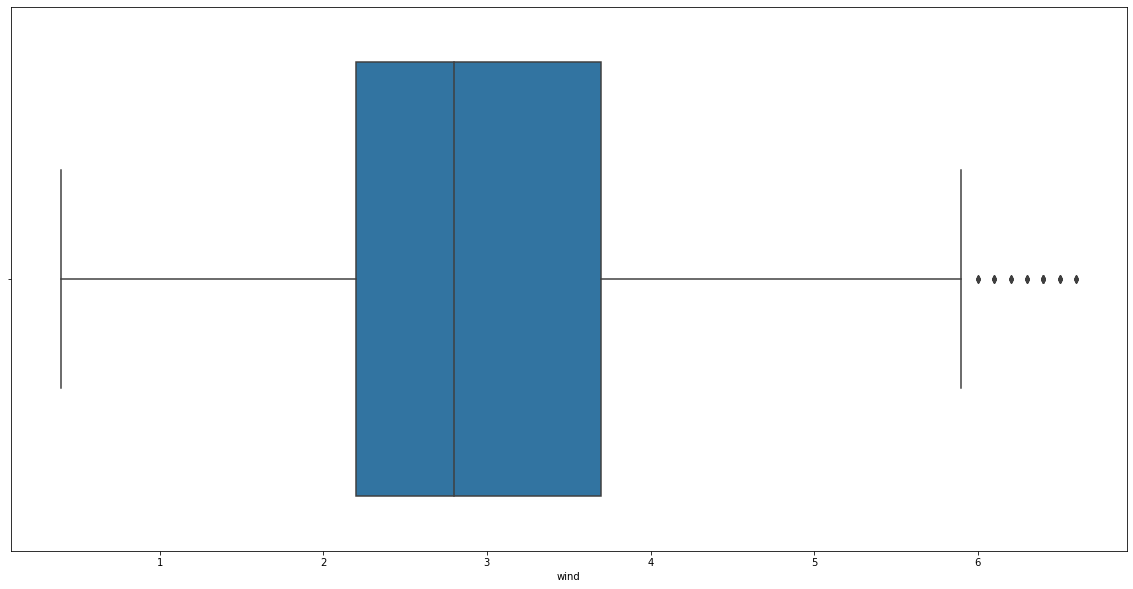

In [93]:
sns.boxplot(df1.wind)

In [94]:
df1.shape

(1233, 6)

In [95]:
# As we have removed the outliers from the data 


# Dropping Unnecessary Columns 

In [101]:
df_final=df1.drop('date',axis=1)

In [102]:
df_final

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


# Scaling the Data 

In [103]:
df_final.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain


In [104]:
# As we have to scale the only one attribute that is out Target Variable i.e weather

In [107]:
from sklearn.preprocessing import LabelEncoder 

In [108]:
le=LabelEncoder()
df_final['weather']=le.fit_transform(df_final['weather'])

In [110]:
df_final # As we have label encoded the Target Variable 

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
2,0.8,11.7,7.2,2.3,2
4,1.3,8.9,2.8,6.1,2
5,2.5,4.4,2.2,2.2,2
6,0.0,7.2,2.8,2.3,2
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,4
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# We have imported the This to split the data into test and train. 

In [113]:
df_final.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [116]:
cols=['precipitation', 'temp_max', 'temp_min', 'wind']
x=df_final[cols]
y=df_final[ 'weather']

In [117]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0) # We have splitted the data into 

In [123]:
# Applying the different Types of Models to check the prediction of weather


In [124]:
df_final.corr()

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.307311,-0.140761,0.194975,-0.330412
temp_max,-0.307311,1.000000,0.884551,-0.070246,0.302575
temp_min,-0.140761,0.884551,1.000000,-0.012292,0.158387
wind,0.194975,-0.070246,-0.012292,1.000000,0.023015
weather,-0.330412,0.302575,0.158387,0.023015,1.000000


,precipitation,temp_max,temp_min,wind
1095,0.0,3.3,-2.7,3.0
495,0.0,26.1,9.4,1.0
1189,0.0,12.8,3.9,1.7
328,0.0,8.9,3.9,1.2
306,5.6,15.0,10.6,1.0
...,...,...,...,...
907,0.0,21.1,14.4,4.1
983,0.0,22.2,12.2,3.9
1429,0.5,5.6,-3.8,1.7
662,0.0,10.0,6.1,0.6


# Random Forest  Classifier with 79% accuracy

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model1=RandomForestClassifier(n_estimators=100)
model1.fit(xtrain,ytrain)

RandomForestClassifier()

In [127]:
pred2=model1.predict(xtest)

In [128]:
from sklearn import metrics

In [129]:
print("Accuracy of the model - ",metrics.accuracy_score(ytest,pred2))

Accuracy of the model -  0.7935222672064778


# Random Forest Reggressor with mean absolute Error

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
model2=RandomForestRegressor(random_state=1)

In [133]:
model2.fit(xtrain,ytrain)

RandomForestRegressor(random_state=1)

In [134]:
pred3=model2.predict(xtest)

In [144]:
from sklearn.metrics import mean_absolute_error

In [145]:
print("Mean Absolute Error: %f" %(mean_absolute_error(ytest,pred3)))

Mean Absolute Error: 0.715726


# Extreme Gradient Regressor

In [150]:
 pip install xgboost

     |████████████████████████████████| 1.7 MB 734 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [151]:
from xgboost import XGBRegressor

In [168]:
model3=XGBRegressor(n_estimators=150,learning_rate=0.04,random_state=0)
model3.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.04, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [169]:
pred4=model3.predict(xtest)

In [170]:
print("Mean Absolute Error: %f" %(mean_absolute_error(ytest,pred4)))

Mean Absolute Error: 0.707292
